# Bootstrapping Example

In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
from collections import defaultdict, Counter, OrderedDict

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 4

ja = '#D12325' # cubs red ... cubs blue = '#0E3386'
zg = '#005596' # dodger blue
kc = '#005596'

In [27]:
arrietaPitches = pd.read_csv('https://raw.githubusercontent.com/gjreda/cy-young-NL-2015/master/data/pitchfx/arrieta.csv', parse_dates=['game_date'])
greinkePitches = pd.read_csv('https://raw.githubusercontent.com/gjreda/cy-young-NL-2015/master/data/pitchfx/greinke.csv', parse_dates=['game_date'])
kershawPitches = pd.read_csv('https://raw.githubusercontent.com/gjreda/cy-young-NL-2015/master/data/pitchfx/kershaw.csv', parse_dates=['game_date'])

In [9]:
arrietaPitches.tail()

,name,player_id,pitch_type,pitch_result,atbat_result,start_speed,z0,x0,pfx_x,pfx_z,px,pz,break_angle,break_length,spin_rate,spin_dir,zone,balls,strikes,outs,play,game_date,inning,inning_topbot,tfs,tfs_zulu,catcher,umpire,umpire_name,stolen_base_attempt,stolen_base_success,batted_ball_type,Unnamed: 32,angle,batted_ball_velocity,direction,hc_x,hc_y,pitch_id,distance_feet
3433,Jake Arrieta,453562,CH,Swinging Strike,Strikeout,87.3,5.899,-3.115,-11.11,2.77,-0.758,0.759,28.8,8.3,2120.252,255.802,13,0,1,1,Kolten Wong strikes out swinging.,2015-04-08,7,top,200213,2015-04-08T20:02:13Z,471083,427533,Mark Wegner,0,0,NaN,NaN,NaN,NaN,NaN,0,0,342,NaN
3434,Jake Arrieta,453562,SL,Foul,Strikeout,90.5,6.044,-3.213,1.86,6.09,-0.654,3.262,-11.8,5.2,1243.328,163.104,1,2,1,2,Jhonny Peralta called out on strikes.,2015-04-08,1,top,183321,2015-04-08T18:33:21Z,471083,427533,Mark Wegner,0,0,NaN,NaN,NaN,NaN,NaN,0,0,41,NaN
3435,Jake Arrieta,453562,SI,Foul,Strikeout,93.5,6.073,-2.807,-8.30,9.42,-0.929,3.431,40.8,4.5,2488.830,221.263,11,2,1,0,Matt Carpenter called out on strikes.,2015-04-08,3,top,185813,2015-04-08T18:58:13Z,471083,427533,Mark Wegner,0,0,NaN,NaN,NaN,NaN,NaN,0,0,123,NaN
3436,Jake Arrieta,453562,SI,Foul,Strikeout,93.9,5.993,-2.955,-8.52,5.51,-1.105,2.500,31.9,5.8,2034.068,236.962,13,2,0,0,Matt Carpenter called out on strikes.,2015-04-08,3,top,185743,2015-04-08T18:57:43Z,471083,427533,Mark Wegner,0,0,NaN,NaN,NaN,NaN,NaN,0,0,122,NaN
3437,Jake Arrieta,453562,CU,Swinging Strike,Strikeout,80.9,6.143,-2.984,4.56,-10.71,-0.489,0.809,-8.6,14.2,1952.529,23.194,13,1,2,2,Matt Adams strikes out swinging.,2015-04-08,3,top,190338,2015-04-08T19:03:38Z,471083,427533,Mark Wegner,0,0,NaN,NaN,NaN,NaN,NaN,0,0,145,NaN


In [28]:
# if it's not a ball, it's a strike
ball_vals = ['Ball', 'Ball In Dirt', 'Intent Ball', 'Hit By Pitch']
swing_and_miss = ['Swinging Strike', 'Swinging Strike (Blocked)', 'Missed Bunt']
hit_vals = ['Single', 'Double', 'Triple', 'Home Run']

arrietaPitches.loc[arrietaPitches.pitch_result.isin(ball_vals), 'is_strike'] = 0
arrietaPitches.loc[arrietaPitches.is_strike != 0, 'is_strike'] = 1
arrietaPitches.loc[arrietaPitches.pitch_result.isin(swing_and_miss), 'swing_and_miss'] = 1
arrietaPitches.loc[arrietaPitches.atbat_result.isin(hit_vals), 'is_hit'] = 1
arrietaPitches.loc[arrietaPitches.atbat_result == 'Single', 'total_bases'] = 1
arrietaPitches.loc[arrietaPitches.atbat_result == 'Double', 'total_bases'] = 2
arrietaPitches.loc[arrietaPitches.atbat_result == 'Triple', 'total_bases'] = 3
arrietaPitches.loc[arrietaPitches.atbat_result == 'Home Run', 'total_bases'] = 4

greinkePitches.loc[greinkePitches.pitch_result.isin(ball_vals), 'is_strike'] = 0
greinkePitches.loc[greinkePitches.is_strike != 0, 'is_strike'] = 1

kershawPitches.loc[kershawPitches.pitch_result.isin(ball_vals), 'is_strike'] = 0
kershawPitches.loc[kershawPitches.is_strike != 0, 'is_strike'] = 1

In [11]:
arrietaPitches.head()

,name,player_id,pitch_type,pitch_result,atbat_result,start_speed,z0,x0,pfx_x,pfx_z,px,pz,break_angle,break_length,spin_rate,spin_dir,zone,balls,strikes,outs,play,game_date,inning,inning_topbot,tfs,tfs_zulu,catcher,umpire,umpire_name,stolen_base_attempt,stolen_base_success,batted_ball_type,Unnamed: 32,angle,batted_ball_velocity,direction,hc_x,hc_y,pitch_id,distance_feet,is_strike,swing_and_miss,is_hit,total_bases
0,Jake Arrieta,453562,SL,"In play, out(s)",Pop Out,90.2,6.294,-2.992,5.78,0.77,0.238,2.296,-19.8,7.5,1150.921,97.998,6,2,0,2,Adam Lind pops out to third baseman Javier Bae...,2015-10-02,6,bot,21030,2015-10-03T02:10:30Z,471083,427019,Ted Barrett,0,0,PU,NaN,NaN,NaN,NaN,77.25,170.24,404,NaN,1,NaN,NaN,NaN
1,Jake Arrieta,453562,CU,"In play, out(s)",Groundout,82.5,6.406,-2.972,5.86,-9.36,0.719,1.339,-11.9,13.2,1919.844,32.187,14,1,2,2,"Khris Davis grounds out, second baseman Starli...",2015-10-02,1,bot,2815,2015-10-03T00:28:15Z,471083,427019,Ted Barrett,0,0,GB,NaN,0,67,NaN,143.82,160.08,58,0,1,NaN,NaN,NaN
2,Jake Arrieta,453562,SL,Swinging Strike,Strikeout,89.2,6.312,-2.893,5.14,-0.68,1.358,2.334,-17.2,8.3,997.789,82.937,14,2,2,0,Luis Sardinas strikes out swinging.,2015-10-02,6,bot,20654,2015-10-03T02:06:54Z,471083,427019,Ted Barrett,0,0,NaN,NaN,NaN,NaN,NaN,0.00,0.00,387,NaN,1,1,NaN,NaN
3,Jake Arrieta,453562,SI,Ball,Strikeout,94.2,6.205,-2.676,-8.30,9.44,0.768,1.568,39.8,4.4,2550.556,221.211,14,1,2,0,Luis Sardinas strikes out swinging.,2015-10-02,6,bot,20636,2015-10-03T02:06:36Z,471083,427019,Ted Barrett,0,0,NaN,NaN,NaN,NaN,NaN,0.00,0.00,386,NaN,0,NaN,NaN,NaN
4,Jake Arrieta,453562,SI,Ball,Strikeout,94.4,6.263,-3.170,-10.16,5.51,-1.520,3.171,38.3,6.0,2342.263,241.350,11,0,0,0,Logan Schafer strikes out swinging. Scooter G...,2015-10-02,1,bot,2053,2015-10-03T00:20:53Z,471083,427019,Ted Barrett,0,0,NaN,NaN,NaN,NaN,NaN,0.00,0.00,36,NaN,0,NaN,NaN,NaN


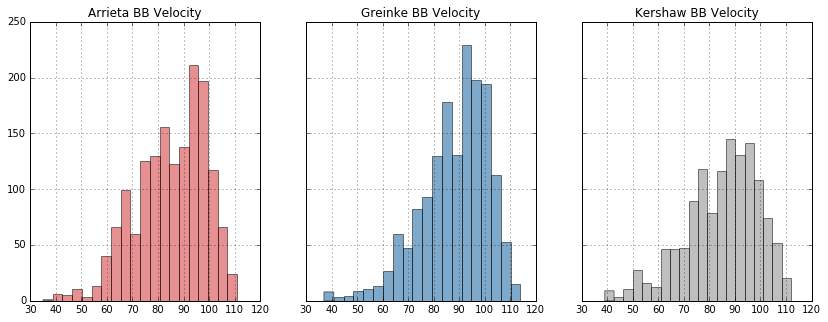

In [29]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(14,5))

arrietaPitches.batted_ball_velocity.hist(ax=axes[0], bins=20, label='Arrieta', alpha=.5, color=ja)
axes[0].set_title('Arrieta BB Velocity')
greinkePitches.batted_ball_velocity.hist(ax=axes[1], bins=20, label='Greinke', alpha=.5, color=zg)
axes[1].set_title('Greinke BB Velocity')
kershawPitches.batted_ball_velocity.hist(ax=axes[2], bins=20, label='Kershaw', alpha=.5, color='grey')
axes[2].set_title('Kershaw BB Velocity');

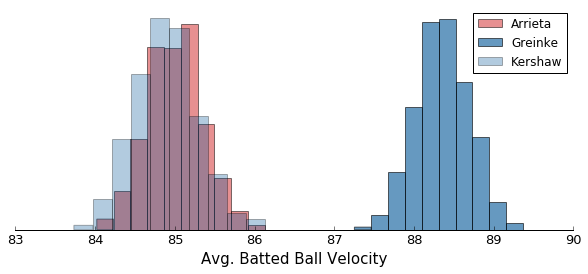

In [30]:
# set random seed for consistency
np.random.seed(49)

arrietaBBs = arrietaPitches[arrietaPitches.batted_ball_velocity > 0].batted_ball_velocity
greinkeBBs = greinkePitches[greinkePitches.batted_ball_velocity > 0].batted_ball_velocity
kershawBBs = kershawPitches[kershawPitches.batted_ball_velocity > 0].batted_ball_velocity
arrietaSamples = []
greinkeSamples = []
kershawSamples = []

for i in range(1000):
    arrietaSamples.append(np.random.choice(arrietaBBs, size=len(arrietaBBs), replace=True))
    greinkeSamples.append(np.random.choice(greinkeBBs, size=len(greinkeBBs), replace=True))
    kershawSamples.append(np.random.choice(kershawBBs, size=len(kershawBBs), replace=True))

arrietaMeans = [np.mean(obs) for obs in arrietaSamples]
greinkeMeans = [np.mean(obs) for obs in greinkeSamples]
kershawMeans = [np.mean(obs) for obs in kershawSamples]

fig, ax = plt.subplots(figsize=(10, 4))
plt.hist(arrietaMeans, alpha=.5, label='Arrieta', color=ja)
plt.hist(greinkeMeans, alpha=.6, label='Greinke', color=zg)
plt.hist(kershawMeans, alpha=.3, label='Kershaw', color=kc)
plt.legend(loc='best')
plt.xlabel('Avg. Batted Ball Velocity', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
plt.tick_params(axis='both', which='major', labelsize=13)
ax.get_yaxis().set_ticks([])
plt.show()